In [1]:
import sys
sys.path.append('../')

from nonlinear_system.ct_system import ContinuousTimeSystem
from nonlinear_system.epidem_odes import UEIV
from lib.estimate import get_poly_estimates
from lib.simulate import simulate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_days = 20
sampling_dt = 1
integration_dt = 0.01

U0 = 4
V0 = 5e-6

uiev_ode = UEIV()
x0 = np.array([U0, 0, 0, V0])

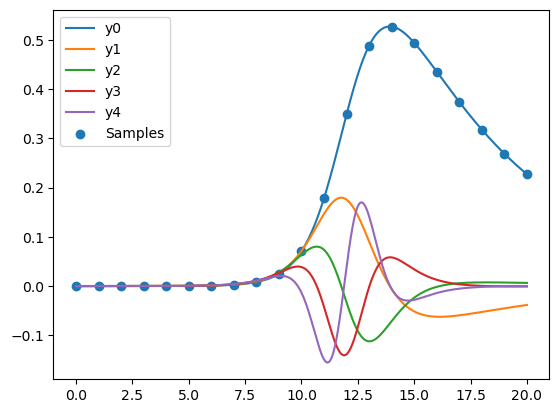

In [3]:
time, x, y_d, t_samples, y_samples = simulate(uiev_ode, x0, integration_dt, sampling_dt, num_days)

plt.plot(time, y_d.T, label=["y"+str(i) for i in range(uiev_ode.nderivs)])
plt.plot(time, np.gradient(y_d[-1], integration_dt), label="y"+str(uiev_ode.nderivs))
plt.scatter(t_samples, y_samples, label="Samples")
plt.legend()
plt.show()

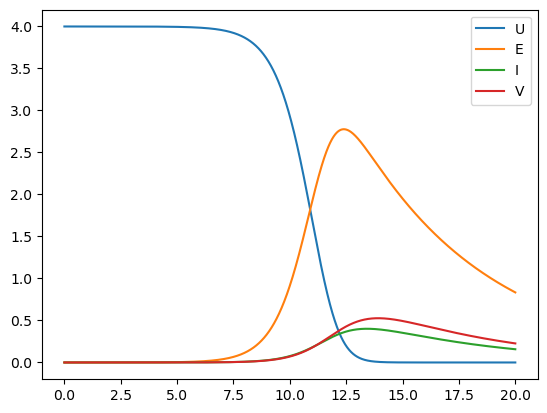

In [4]:
states = ["U", "E", "I", "V"]
plt.plot(time, x.T, label=states)
plt.legend()
plt.show()

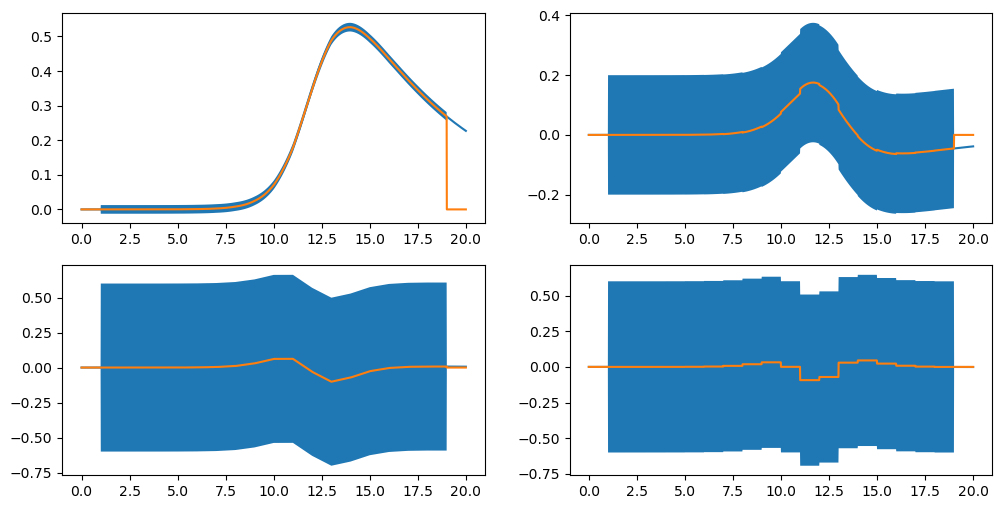

In [5]:
window_size = 4 # Number of samples in window
delay = 1
d = 3

Y_max = [0.6, 0.2, 0.2, 0.2, 0.2]

y_hat, y_bound = get_poly_estimates(t_samples, y_samples, Y_max, window_size, sampling_dt, d, delay, uiev_ode.nderivs, integration_dt)        

plt.figure(figsize=(12,6))
for j in range(uiev_ode.nderivs):
    plt.subplot(2,2,j+1)
    plt.plot(time, y_d[j])
    plt.plot(time, y_hat[j])
    plt.fill_between(time, y_hat[j]-y_bound[j], y_hat[j]+y_bound[j])

plt.show()

In [6]:
x_hat = sir_ode.invert_output(t=0, y_d=y_hat)

states = ["S","I"]

plt.figure(figsize=(12,6))
for j in range(2):
    plt.subplot(1,2,j+1)
    plt.plot(time, x[j], label=states[j]+" Real")
    plt.plot(time, x_hat[j], label=states[j]+" Estimate")
    plt.legend()
plt.show()

NameError: name 'sir_ode' is not defined

In [ ]:
y0 = y_d[0]
y1 = np.gradient(y0, integration_dt)
y2 = np.gradient(y1, integration_dt)
y3 = np.gradient(y2, integration_dt)

print(np.max(y0))
print(np.max(y1))
print(np.max(y2))
print(np.max(y3))

0.004343895998215301
0.00042516828494998556
4.011684236649056e-05
0.0004622776411883703
